# Regression

As always we must first import the libraries that we need:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

If we want to make a function that graphs a straight line we could do so like this:

In [2]:
# declare function called linear_line
# function takes an array fro the x values,
# and a number for the slope (m) and the 
# y-intercept(b), then returns an array of y values

def linear_line(x, m, b): # declaration of function
    return m*x + b #function returns y = m*x + b


If I would like to make a line with a slope of 4 and a y-intercept of 2:

In [3]:
m = 4 # set m (slope) equal to 4
b = 2 # set b (y-intercept) equal to 2

# the numpy arrange function is of the 
# form np.arrange(start, end, increment)
x = np.arange(1, 21, 1) # create numpy array from 1 to 21 in increments 
                        # of 1

# create y that corresponds to x using the linear_line(x, m, b)
y = linear_line(x, m, b)

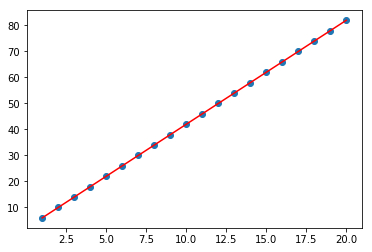

In [4]:
# plot the points as a scatter plot and as a line
plt.scatter(x, y)
plt.plot(x, y, color='red')

But what if I had a bunch of data points and wanted to get a line?

In [5]:
# import the stats module from scipy
from scipy import stats

In [6]:
# run linear regression on the (x, y) points we made
stats.linregress(x, y)

LinregressResult(slope=4.0, intercept=2.0, rvalue=1.0, pvalue=9.49609375000032e-179, stderr=0.0)

This function tells us what the slope is but we already knew that. Let's add some randomness to our data and see what happens:

In [7]:
# create random noise using np.random.normal(mean, st. dev., #points)
noise = np.random.normal(3, 3, 20)

# add the random noise to y
noisy_y = y + noise

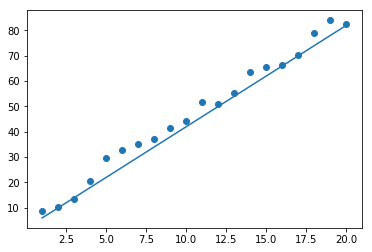

In [8]:
# plot the new points and the old regression line
plt.scatter(x, noisy_y)
plt.plot(x, y)

Our line doesn't look like such a good fit for the data anymore, so let's find a new one:

In [9]:
# run linear regression on the new data
new_line = stats.linregress(x, noisy_y)

# Look at output
print(new_line)

LinregressResult(slope=3.98983951927307, intercept=5.244519910592906, rvalue=0.9945008836922701, pvalue=4.2812796089053776e-19, stderr=0.09903246084643827)


We can see that the first item in the list is the slope and the second is the intercept therefore:

In [10]:
# Grab the slope and y-intercept as the first and second 
# elements of new_line
slope = new_line[0]
y_int = new_line[1]

print("slope = ", slope, ", y-int = ", y_int)

slope =  3.98983951927307 , y-int =  5.244519910592906


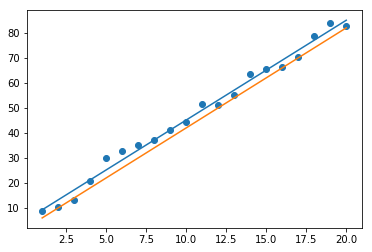

In [11]:
# plot a scatterplot of the noisy data
plt.scatter(x, noisy_y)


# plot the new line
plt.plot(x, linear_line(x, slope, y_int))

#plot the original line
plt.plot(x, y)

Now, what if we have more complicated lines? Say quadratic, or exponential? Let's try another function with a linear trend first before exploring these other options:

In [12]:
from scipy.optimize import curve_fit

Let's make some random data again:

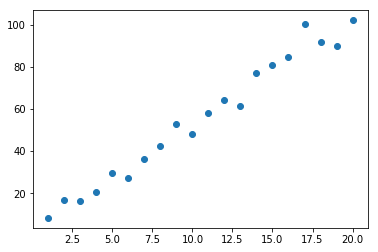

In [13]:
# make a line with slope = 5 and y-int = 2
y = linear_line(x, 5, 2)

# add noise to y
y = y + np.random.normal(3, 5, 20)

# plot the noisy data points
plt.scatter(x,y)

And now we can use curve_fit on our linear function:

In [14]:
# the curve_fit function take in three variables: 
# a function that defines the type of line, the 
# x values of the data, and the y values of the data

# the curve_fit function returns two objects: an array
# of the coefficients and an array of covariants, which 
# can help determine the error

opt, cov = curve_fit(linear_line, x, y)

print(opt)
print(cov)

[5.0470348  2.46525722]
[[ 0.03298222 -0.34631327]
 [-0.34631327  4.73294738]]


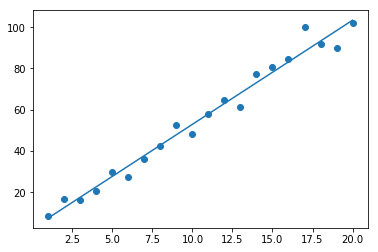

In [15]:
# plot (x,y) data as scatterplot
plt.scatter(x, y)

# plot regression line
plt.plot(x, linear_line(x, opt[0], opt[1]))

Let's try some other types of functions. Here are some function definitions:

In [16]:
# Definition for linear line function
def linear_line(x, m, b):
    y = m*x + b
    return y

# definition for quadratic line function
def quadratic_line(x, a, b, c):
    y = a*(x**2) + b*x + c
    return y

# definition for exponential line function
def exponential_line(x, a, b, c):
    y = a*np.exp(b*x) + c
    return y

# definition for log line function
# For log you will need to change x to x+1 so
# that you are not dividing by zero!
def log_line(x, a, b, c):
    y = a*np.log(b*x) + c
    return y

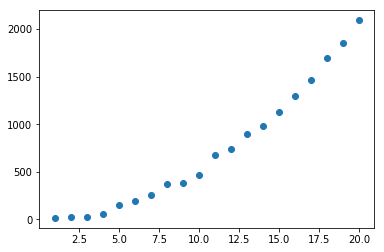

In [17]:
# make a new quadratic line
y = quadratic_line(x, 5, 2, 2)

# add random noise
y = y + np.random.normal(0, 30, 20)

# make a scatter plot
plt.scatter(x,y)

[-0.06206813  1.86667777 -1.92076776]
[[ 1.52591601e-04 -3.20442362e-03  1.17495532e-02]
 [-3.20442362e-03  7.13213137e-02 -2.89039006e-01]
 [ 1.17495532e-02 -2.89039006e-01  1.48279359e+00]]


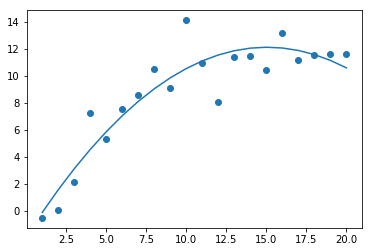

In [26]:
# run the curve_fit function using our quadratic line function
opt, cov = curve_fit(quadratic_line, x, y)

# print the output of curve_fit
print(opt)
print(cov)

# plot the (x, y) data points and the quadratic fit line
plt.scatter(x,y)
plt.plot(x, quadratic_line(x, opt[0], opt[1], opt[2]))

Now let's repeat this for an expoenential line:

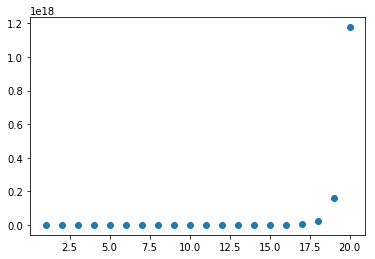

In [22]:
y = exponential_line(x, 5, 2, 2)
y = y + np.random.normal(4, 30, 20)
plt.scatter(x,y)

/Users/laurenkoulias/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/Users/laurenkoulias/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]


(array([2.19199029, 2.00174051, 1.48648158]),
 array([[ 8.62521463e+03, -1.96917566e+02, -5.52814294e+10],
        [-1.96917566e+02,  4.49593069e+00,  1.26205193e+09],
        [-5.52814294e+10,  1.26205193e+09,  2.34515070e+33]]))

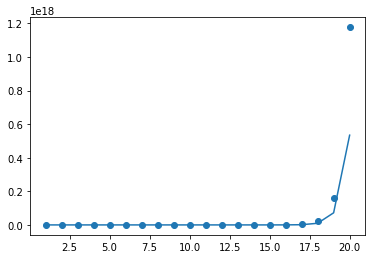

In [23]:
opt, cov = curve_fit(exponential_line, x, y)

plt.scatter(x,y)
plt.plot(x, exponential_line(x, opt[0], opt[1], opt[2]))

curve_fit(exponential_line, x, y)

Now let's repeat this for a log line:

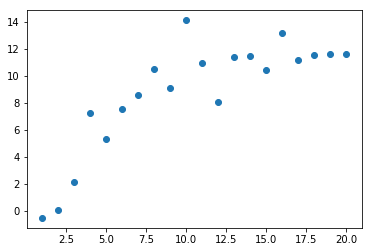

In [24]:
y = log_line(x, 5, 0.5, 0.5)
y = y + np.random.normal(1, 2, 20)
plt.scatter(x,y)

/Users/laurenkoulias/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log


(array([ 4.66348679,  0.86024568, -0.39702084]),
 array([[ 3.93020239e-01, -9.39524587e+05,  5.09326601e+06],
        [-9.39524576e+05,  5.77093768e+12, -3.12848901e+13],
        [ 5.09326595e+06, -3.12848901e+13,  1.69598842e+14]]))

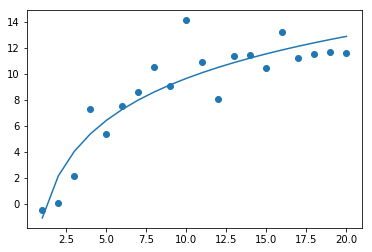

In [25]:
opt, cov = curve_fit(log_line, x, y)

plt.scatter(x,y)
plt.plot(x, log_line(x, opt[0], opt[1], opt[2]))

curve_fit(log_line, x, y)

Now lets's talk about error:

Our average error is 1.1 and our correlation coefficient is 0.91, so our line fits the data decently well.

# Logistic Regression

Now let's talk about what would happen if our data was binary, meaning that we only had two options like true/false, short/tall, or wet/dry. We will also be talking about how to split data into training and testing data.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
df = pd.read_csv('life_exp.csv')

We are going to be focusing on Lifeexp and Status_binary, so let's plot them:

Now we are going to separate our data into a training and a testing set, at an 80:20 ratio.

Now we can create the LogisticRegression model and fit our data.

Now, let's graph what this model looks like:

In [20]:
from scipy.special import expit

There are several other class variables that we can look at.

Now lets run our test set and see how well our training set can predict it:

Now lets look at the confusion matrix and classification report: